In [1]:
import pandas as pd
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")


- First Data in Toy data in which Actual and Predicted Values are Equally nearly. When we Calculate 1. MSE 2. RMSE 3.MAE . The Values are nearly to zero which Indicates Better Fit . 

In [2]:
# Example data (replace these with your actual and predicted values)
X_test = np.array([3, 0, 2, 5, 4.8])
y_pred = np.array([2.9, 0.0, 2, 5, 5])
# Mean Squared Error (MSE)
mse = mean_squared_error(X_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(X_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R²)
r2 = r2_score(X_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.010000000000000018
Root Mean Squared Error (RMSE): 0.10000000000000009
Mean Absolute Error (MAE): 0.06000000000000005
R-squared (R²): 0.9970984215413184


The extremely low values of MSE, RMSE, and MAE suggest that the model is making highly accurate predictions with very small errors.
The very high R-squared value indicates that the model explains a very large proportion of the variance in the target variable, suggesting an excellent fit to the data.

---

- Then I take Tips Dataset and predict tip using Linear Regression .The model seems to have a moderate level of predictive performance, as indicated by the relatively moderate values of MSE, RMSE, and MAE.
The R-squared value of 0.71 suggests that the model captures a substantial portion of the variability in the target variable, indicating a good fit. However, the interpretation of R-squared should also consider the specific context of your analysis.

In [5]:
df = sns.load_dataset('tips')
df = df[['tip', 'total_bill']]
df.head()

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


In [4]:
# Quantile Tranformer
qt = QuantileTransformer(output_distribution = 'normal')
df['total_bill'] = qt.fit_transform(df[['total_bill']])
df['tip'] = qt.fit_transform(df[['tip']])
#X and y 

In [102]:
df = sns.load_dataset('tips')
df = df[['tip', 'total_bill']]
df.head()
# Quantile Tranformer
qt = QuantileTransformer(output_distribution = 'normal')
df['total_bill'] = qt.fit_transform(df[['total_bill']])
df['tip'] = qt.fit_transform(df[['tip']])
#X and y 
X = df.drop('tip', axis = 1)
y = df['tip']
# Train test Split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
#Model 
model = LinearRegression()
# Fit 
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# MAE 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Squared Error: 0.38496325868217957
Mean Absolute Error: 0.49831931176239663
Root Mean Squared Error (RMSE): 0.6204540745955172
R-squared (R²): 0.706738604974501


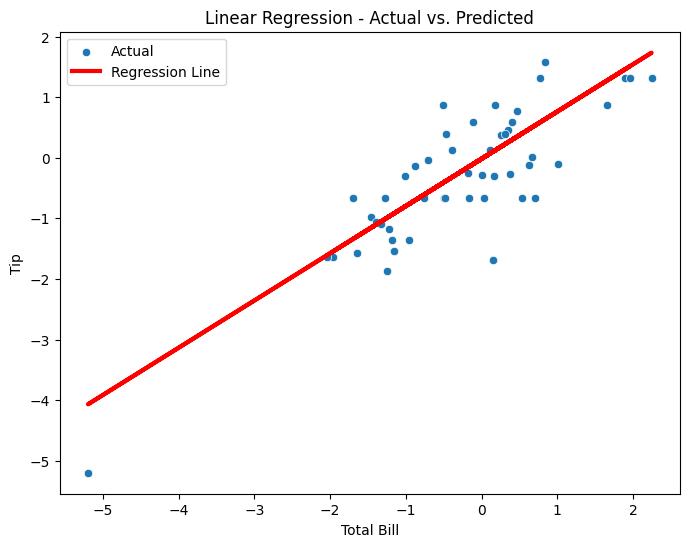

In [103]:
# Plotting the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
sns.scatterplot(x=X_test['total_bill'], y=y_test, label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')

plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()

---

- The relatively high values of MSE and RMSE suggest that the model is not performing well in terms of accuracy, and the predictions have a considerable amount of error.
The R-squared value being close to zero indicates that the model is not capturing much of the variability in the target variable. This could be due to various reasons, such as a poor choice of features or an inappropriate model for the data.

In [121]:
df = sns.load_dataset('titanic')
df = df[['age', 'fare']]
df.head()
# # Remove Outliers 
# df = df[(df['age'] >= 5) & (df['age'] <= 50)]
# df = df[(df['fare'] >= 10) & (df['fare'] <= 100)]
# Quantile Transformer
qt = QuantileTransformer(output_distribution = 'normal')
df['age'] = qt.fit_transform(df[['age']])
df['fare'] = qt.fit_transform(df[['fare']])
# Impute Missing 
df.dropna(inplace = True)
#X and y 
X = df.drop('age', axis = 1)
y = df['age']
# Train test Split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
#Model 
model = LinearRegression()
# Fit 
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# MAE 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Squared Error: 0.8986899883333237
Mean Absolute Error: 0.7725878850939346
Root Mean Squared Error (RMSE): 0.94799260985164
R-squared (R²): -0.024187233907758676


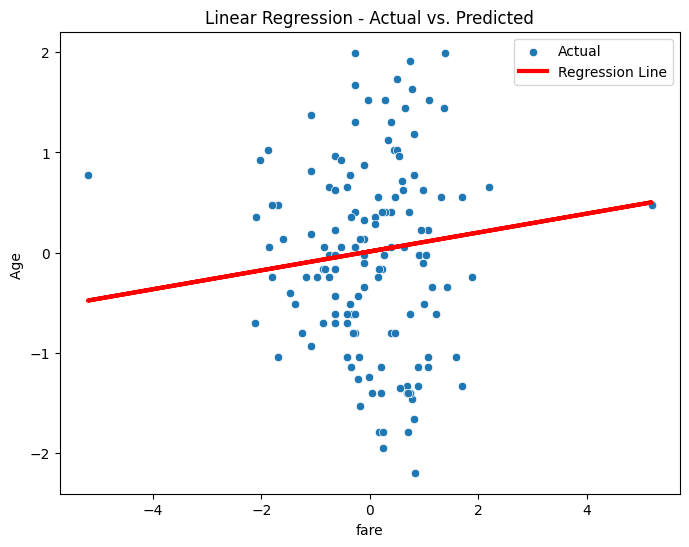

In [120]:
# Plotting the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
sns.scatterplot(x=X_test['fare'], y=y_test, label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')

plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('fare')
plt.ylabel('Age ')
plt.legend()
plt.show()